In [1]:
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [2]:
tickers = ['^N225', 'NDAQ', 'IBM', 'MSFT']
start = dt.datetime(1970, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [3]:
data.head()

Adj Close                             Close                         \
                 IBM MSFT NDAQ        ^N225        IBM MSFT NDAQ        ^N225   
Date                                                                            
1970-01-02  3.901270  NaN  NaN          NaN  17.435469  NaN  NaN          NaN   
1970-01-05  3.938706  NaN  NaN  2402.850098  17.602772  NaN  NaN  2402.850098   
1970-01-06  3.941378  NaN  NaN  2406.219971  17.614723  NaN  NaN  2406.219971   
1970-01-07  3.944050  NaN  NaN  2394.959961  17.626673  NaN  NaN  2394.959961   
1970-01-08  3.952074  NaN  NaN  2283.679932  17.662523  NaN  NaN  2283.679932   

                 High       ...  Low                    Open            \
                  IBM MSFT  ... NDAQ        ^N225        IBM MSFT NDAQ   
Date                        ...                                          
1970-01-02  17.483271  NaN  ...  NaN          NaN  17.423517  NaN  NaN   
1970-01-05  17.602772  NaN  ...  NaN  2402.850098  17.495220  NaN  NaN   
1970-01-06  17.638622  NaN  ...  NaN  2406.219971  17.602772  NaN  NaN   
1970-01-07  17.626673  NaN  ...  NaN  2394.959961  17.614723  NaN  NaN   
1970-01-08  17.662523  NaN  ...  NaN  2283.679932  17.626673  NaN  NaN   

                           Volume                  
                  ^N225       IBM MSFT NDAQ ^N225  
Date                                               
1970-01-02          NaN  330536.0  NaN  NaN   NaN  
1970-01-05  2402.850098  443504.0  NaN  NaN   0.0  
1970-01-06  2406.219971  510448.0  NaN  NaN   0.0  
1970-01-07  2394.959961  479068.0  NaN  NaN   0.0  
1970-01-08  2283.679932  740568.0  NaN  NaN   0.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
log_returns = np.log(data/data.shift())

In [6]:
log_returns

,IBM,MSFT,NDAQ,^N225
Date,,,,
1970-01-02,NaN,NaN,NaN,NaN
1970-01-05,0.009550,NaN,NaN,NaN
1970-01-06,0.000678,NaN,NaN,0.001401
1970-01-07,0.000678,NaN,NaN,-0.004691
1970-01-08,0.002032,NaN,NaN,-0.047578
...,...,...,...,...
2023-05-05,0.008773,0.017012,0.020790,NaN
2023-05-08,-0.002024,-0.006459,0.000000,NaN
2023-05-09,-0.004693,-0.005360,-0.006577,0.010068


In [7]:
sp500 = pdr.get_data_yahoo("^GSPC", start)

[*********************100%***********************]  1 of 1 completed


In [8]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [9]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [10]:
test_correlation("^N225")

[*********************100%***********************]  1 of 1 completed


,IBM,MSFT,NDAQ,^N225,SP500
IBM,1.000000,0.447276,0.362919,0.061522,0.634073
MSFT,0.447276,1.000000,0.398952,0.067024,0.646897
NDAQ,0.362919,0.398952,1.000000,0.119654,0.562369
^N225,0.061522,0.067024,0.119654,1.000000,0.124512
SP500,0.634073,0.646897,0.562369,0.124512,1.000000


In [11]:
test_correlation("^GSPC")

[*********************100%***********************]  1 of 1 completed


,IBM,MSFT,NDAQ,^N225,SP500,^GSPC
IBM,1.000000,0.447276,0.362919,0.060801,0.634073,0.634073
MSFT,0.447276,1.000000,0.398952,0.073336,0.646897,0.646897
NDAQ,0.362919,0.398952,1.000000,0.123040,0.562369,0.562369
^N225,0.060801,0.073336,0.123040,1.000000,0.128371,0.128371
SP500,0.634073,0.646897,0.562369,0.128371,1.000000,1.000000
^GSPC,0.634073,0.646897,0.562369,0.128371,1.000000,1.000000


In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


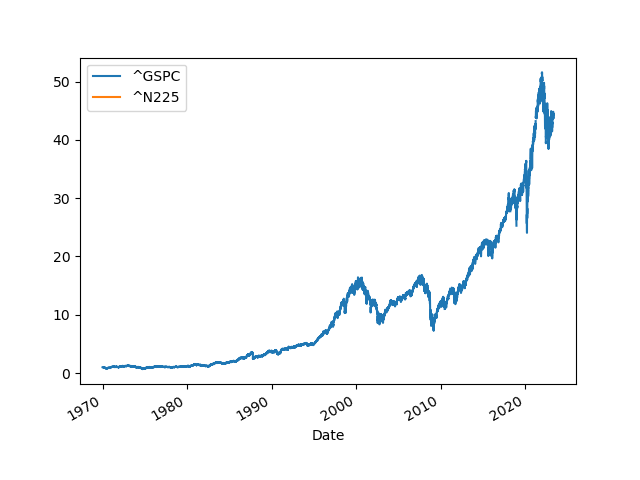

In [14]:

visualize_correlation("^GSPC", "^N225")